In [1]:
import iris
import matplotlib.pyplot as plt
import iris.plot as iplt
import numpy as np
import warnings

These plots show timeseries of the mean development of single level variables over the tropical western pacific for January 2014. The region studied contains no land points. 
x-axis units are day of month. 

The BARPA models were all initialised on day 1 except for BARPA-ERA5, which was initialised in 1979.

In most cases, hourly BARPA data is compared with daily CMIP6 data, as hourly CMIP6 data was not always available for these variables. However, precip has been aggregated to daily.

In [2]:
cx = iris.Constraint(longitude=lambda x: 160<=x<=200)
cy = iris.Constraint(latitude=lambda x: -10<=x<=10)
ct = iris.Constraint(time = lambda t: t.point.year==2014  and t.point.month==1)

In [8]:

('av_lat_hflx','hfls','SLV1H','day')

def load_month(var_b,var_c,barpa_str,cmip_str,cx,cy):
    with warnings.catch_warnings():
        warnings.simplefilter('ignore') 
        out = {}
        out['CMIP_TA'] = iris.load_cube("/g/data/fs38/publications/CMIP6/CMIP/CSIRO*/ACCESS-CM2/historical/r4i1p1f1/%s/%s/gn/latest/*2000*.nc"%(cmip_str,var_c),cx&cy&ct)
        out['CMIP_TM'] = iris.load_cube("/g/data/oi10/replicas/CMIP6/CMIP/MRI/MRI-ESM2-0/historical/r1i1p1f1/%s/%s/gn/*/*2000*.nc"%(cmip_str,var_c),cx&cy&ct)
        out['CMIP_T'] = iris.load_cube("/g/data/oi10/replicas/CMIP6/CMIP/NCC/NorESM2-MM/historical/r1i1p1f1/%s/%s/gn/*/*2010*.nc"%(cmip_str,var_c),cx&cy&ct)
        out['CMIP_EC'] = iris.load_cube("/g/data/oi10/replicas/CMIP6/CMIP/E*/EC-Earth3/historical/r1i1p1f1/%s/%s/gr/*/*2014*.nc"%(cmip_str,var_c),cx&cy&ct)
        
        out['BARPA_TA'] = iris.load("/g/data/tp28/dev/barpa/prod/eh6215/cg282_ACCESS-CM2_ssp370*/201401*01T0000Z/nc/%s/%s-CMIP6-*-ssp370-r4i1p1f1-barpa_r-v1-2014*"%(barpa_str,var_b),cx&cy)    
        out['BARPA_TEC'] = iris.load("/g/data/tp28/dev/barpa/prod/hxy548/cg282_EC-Earth3_ssp370*/201401*01T0000Z/nc/%s/%s-CMIP6-*-ssp370-r1i1p1f1-barpa_r-v1-2014*"%(barpa_str,var_b),cx&cy)    
        out['BARPA_TE5'] = iris.load("/g/data/tp28/dev/barpa/prod/chs548/cg282_ERA5_historical_1979_sciB/201401*01T0000Z/nc/%s/%s-*-barpa_r-v1-2014*"%(barpa_str,var_b),cx&cy)    
        out['BARPA_T'] = iris.load("/g/data/tp28/dev/barpa/prod/chs548/cg282_NorESM2-MM_ssp370*B/201401*01T0000Z/nc/%s/%s-CMIP6-*-ssp370-r1i1p1f1-barpa_r-v1-2014*"%(barpa_str,var_b),cx&cy)
        out['BARPA_TM'] = iris.load("/g/data/tp28/dev/barpa/prod/hxy548/cg282_MRI-ESM2-0_ssp126_2014_sciB_6hrLev/201401*01T0000Z/nc/%s/%s-CMIP6-*-ssp126-r1i1p1f1-barpa_r-v1-2014*"%(barpa_str,var_b),cx&cy)
        out['BARPA_T_new'] = iris.load("/g/data/tp28/dev/barpa/trials/eh6215/cg282_NorESM2_adjSST/201401*01T0000Z/nc/%s/%s-CMIP6-*-ssp370-r1i1p1f1-barpa_r-v1-2014*"%(barpa_str,var_b),cx&cy)

        
        for key in out.keys():
            if 'CMIP' in key:
                aw = iris.analysis.cartography.area_weights(out[key])
                out[key] = out[key].collapsed(['longitude','latitude'],iris.analysis.MEAN,weights=aw)
            elif 'BARPA' in key:        
                iris.util.equalise_attributes(out[key])
                out[key] = out[key].concatenate_cube().collapsed(['longitude','latitude'],iris.analysis.MEAN)        
        return out


In [5]:
lhf = load_month('av_lat_hflx','hfls','SLV1H','day',cx,cy)
lhf['era5']= iris.load_cube("/g/data/rt52/era5/single-levels/reanalysis/mslhf/2014/*201401*.nc",cx&cy).collapsed(['longitude','latitude'],iris.analysis.MEAN)*-1
lhf

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/cube.py:3696: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


{'CMIP_TA': <iris 'Cube' of surface_upward_latent_heat_flux / (W m-2) (time: 31)>,
 'CMIP_TM': <iris 'Cube' of surface_upward_latent_heat_flux / (W m-2) (time: 31)>,
 'CMIP_T': <iris 'Cube' of surface_upward_latent_heat_flux / (W m-2) (time: 31)>,
 'CMIP_EC': <iris 'Cube' of surface_upward_latent_heat_flux / (W m-2) (time: 31)>,
 'BARPA_TA': <iris 'Cube' of surface_upward_latent_heat_flux / (W m-2) (time: 744)>,
 'BARPA_TEC': <iris 'Cube' of surface_upward_latent_heat_flux / (W m-2) (time: 744)>,
 'BARPA_TE5': <iris 'Cube' of surface_upward_latent_heat_flux / (W m-2) (time: 744)>,
 'BARPA_T': <iris 'Cube' of surface_upward_latent_heat_flux / (W m-2) (time: 744)>,
 'BARPA_TM': <iris 'Cube' of surface_upward_latent_heat_flux / (W m-2) (time: 744)>,
 'BARPA_T_new': <iris 'Cube' of surface_upward_latent_heat_flux / (W m-2) (time: 744)>,
 'BARPA_T_adj': <iris 'Cube' of surface_upward_latent_heat_flux / (W m-2) (time: 744)>,
 'era5': <iris 'Cube' of unknown / (kg.s-3) (time: 744)>}

In [9]:
#cx = iris.Constraint(longitude=lambda x: 130<=x<=136)
#cy = iris.Constraint(latitude=lambda x: -23<=x<=-15)
pr = load_month('av_prcp_rate','pr','SLV1H','day',cx,cy)
pr['era5']= iris.load_cube("/g/data/rt52/era5/single-levels/reanalysis/mtpr/2014/*201401*.nc",cx&cy).collapsed(['longitude','latitude'],iris.analysis.MEAN)

for key in pr:
    pr[key].units='mm/s'
    pr[key].convert_units('mm/day')

In [31]:
mslp = load_month('mslp','psl','SLV15M','day',cx,cy)
mslp['era5']= iris.load_cube("/g/data/rt52/era5/single-levels/reanalysis/msl/2014/*201401*.nc",cx&cy).collapsed(['longitude','latitude'],iris.analysis.MEAN)

In [30]:
tas = load_month('temp_scrn','tas','SLV15M','day',cx,cy)
tas['era5']= iris.load_cube("/g/data/rt52/era5/single-levels/reanalysis/2t/2014/*201401*.nc",cx&cy).collapsed(['longitude','latitude'],iris.analysis.MEAN)

In [25]:

def plot(data,name):
    plt.figure(figsize=(12,12))
    plt.subplot(511)
    plt.title(name)
    n1 = data['BARPA_T'].shape[0]
    n2 = data['CMIP_T'].shape[0]
    plt.plot(np.linspace(0,31,n1),data['BARPA_T'][:].data,c='tab:blue',label='Barpa Nor',ls='--')
    plt.plot(np.linspace(0,31,n1),data['BARPA_T_new'][:].data,c='tab:blue',lw=2,ls=":",label='Barpa Nor adj2')
    plt.plot(np.linspace(0,31,n2),data['CMIP_T'].data,c='tab:blue',lw=2,label='NorESM2')
    plt.legend()
    plt.subplot(512)      #plt.title("Latent Heat Flux")
    plt.plot(np.linspace(0,31,n2),data['CMIP_TA'].data,c='tab:green',lw=2,label='ACCESS-CM2')
    plt.plot(np.linspace(0,31,n1),data['BARPA_TA'].data,c='tab:green',ls='--',label='Barpa CM2')
    plt.legend()
    plt.subplot(513)      #plt.title("Latent Heat Flux")
    plt.plot(np.linspace(0,31,n2),data['CMIP_EC'].data,c='tab:red',lw=2,label='EC-Earth3')
    plt.plot(np.linspace(0,31,n1),data['BARPA_TEC'].data,c='tab:red',ls='--',label='Barpa EC-Earth3')
    plt.legend()
    plt.subplot(514)      #plt.title("Latent Heat Flux")
    plt.plot(np.linspace(0,31,n2),data['CMIP_TM'].data,c='tab:orange',lw=2,label='MRI')
    plt.plot(np.linspace(0,31,n1),data['BARPA_TM'].data,c='tab:orange',ls='--',label='Barpa MRI')
    plt.legend()
    plt.subplot(515)      #plt.title("Latent Heat Flux")
    plt.plot(np.linspace(0,31,n1),data['BARPA_TE5'].data,c='tab:purple',ls='--',label='Barpa ERA5')
    if 'era5' in data.keys():
        n3 = data['era5'].shape[0]
        plt.plot(np.linspace(0,31,n3),data['era5'].data,c='tab:purple',lw=2,label='ERA5')
    plt.legend()


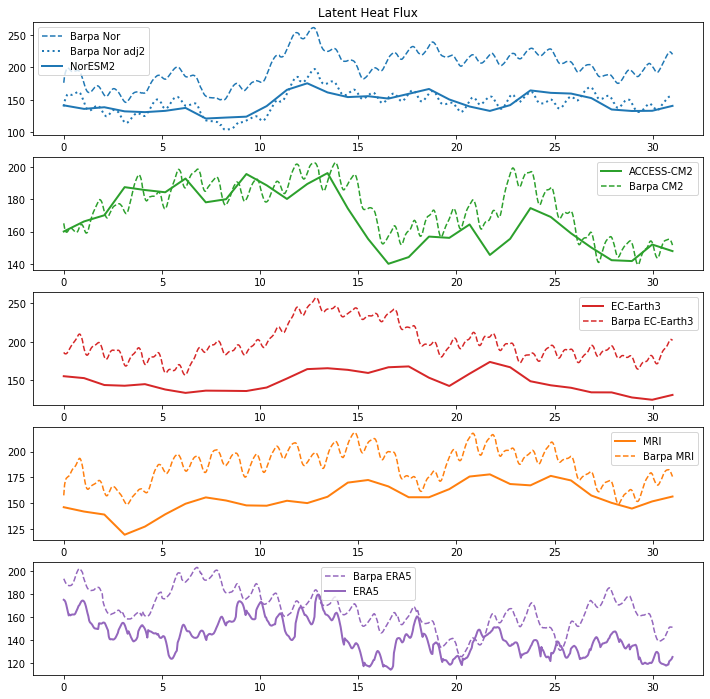

In [26]:
plot(lhf,'Latent Heat Flux')

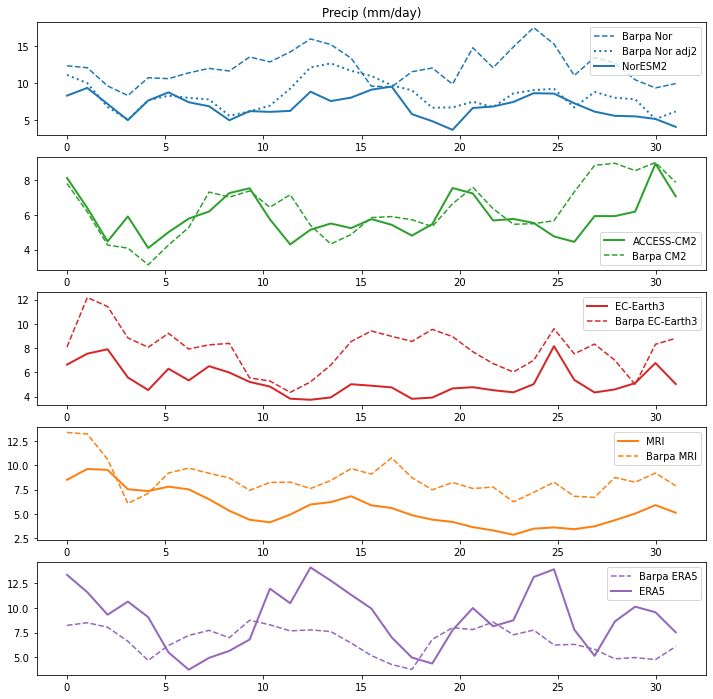

In [29]:
from iris.coord_categorisation import add_day_of_year
for key in pr:
    if 'BARPA' in key or 'era5' in key:
        if 'doyr' not in [c.name() for c in pr[key].coords()]:
            add_day_of_year(pr[key],'time','doyr')
            pr[key]=pr[key].aggregated_by('doyr',iris.analysis.MEAN)
plot(pr,'Precip (mm/day)')

In [35]:
mslp
for key in mslp.keys():
    if 'BARPA' in key:
        mslp[key]=mslp[key][:2976]

{'CMIP_TA': <iris 'Cube' of air_pressure_at_mean_sea_level / (Pa) (time: 31)>,
 'CMIP_TM': <iris 'Cube' of air_pressure_at_mean_sea_level / (Pa) (time: 31)>,
 'CMIP_T': <iris 'Cube' of air_pressure_at_mean_sea_level / (Pa) (time: 31)>,
 'CMIP_EC': <iris 'Cube' of air_pressure_at_mean_sea_level / (Pa) (time: 31)>,
 'BARPA_TA': <iris 'Cube' of air_pressure_at_sea_level / (Pa) (time: 2976)>,
 'BARPA_TEC': <iris 'Cube' of air_pressure_at_sea_level / (Pa) (time: 2976)>,
 'BARPA_TE5': <iris 'Cube' of air_pressure_at_sea_level / (Pa) (time: 2976)>,
 'BARPA_T': <iris 'Cube' of air_pressure_at_sea_level / (Pa) (time: 2976)>,
 'BARPA_TM': <iris 'Cube' of air_pressure_at_sea_level / (Pa) (time: 2976)>,
 'BARPA_T_new': <iris 'Cube' of air_pressure_at_sea_level / (Pa) (time: 2976)>}

ERA-5 is initialised in 1979, and all the other models in 2014 (the year plotted), so don't read into the fact that ERA5 screen temperatures miss the sudden ramp up on day 1

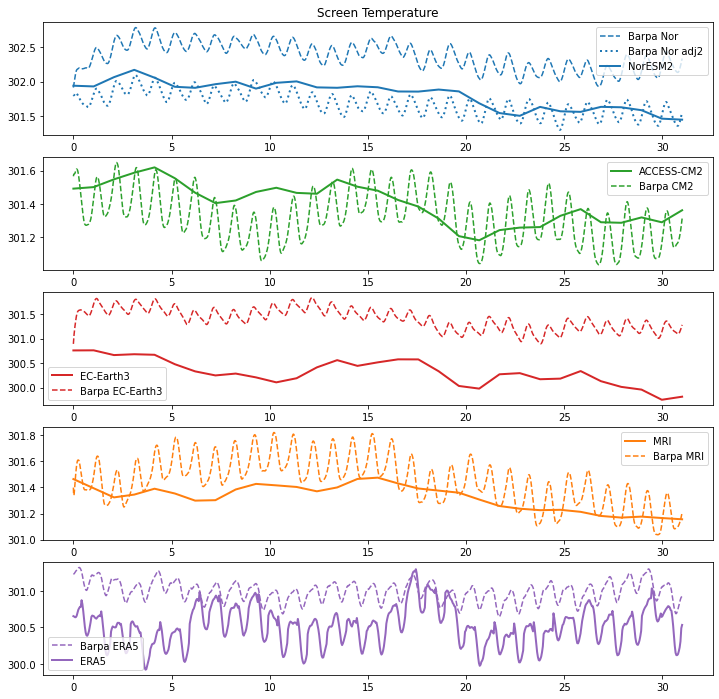

In [45]:
plot(tas,'Screen Temperature')

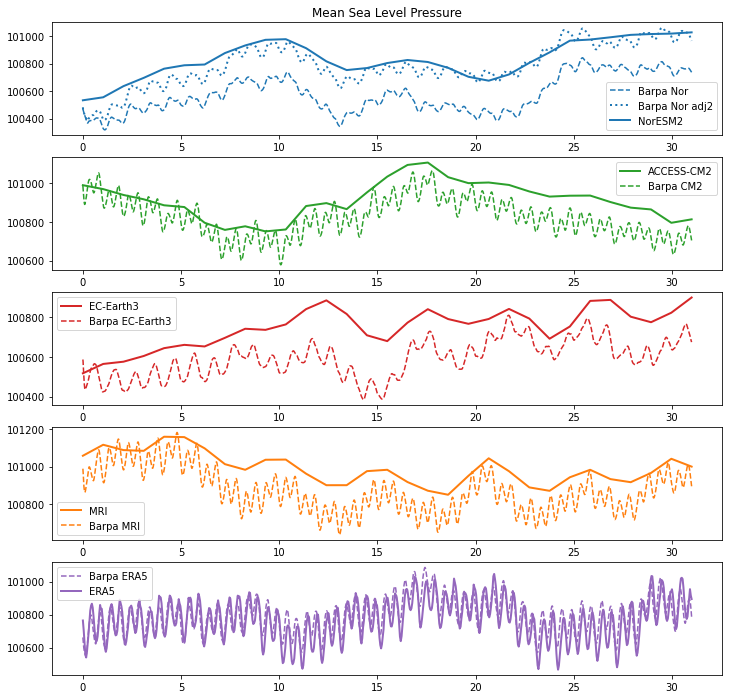

In [43]:
plot(mslp,'Mean Sea Level Pressure')

In [19]:
('av_lat_hflx','hfls','SLV1H','day')

def load_month_map(var_b,var_c,barpa_str,cmip_str,cx,cy):
    out = {}
    out['CMIP_TA'] = iris.load_cube("/g/data/fs38/publications/CMIP6/CMIP/CSIRO*/ACCESS-CM2/historical/r4i1p1f1/%s/%s/gn/latest/*2000*.nc"%(cmip_str,var_c),cx&cy&ct)
    out['CMIP_T'] = iris.load_cube("/g/data/oi10/replicas/CMIP6/CMIP/NCC/NorESM2-MM/historical/r1i1p1f1/%s/%s/gn/*/*2010*.nc"%(cmip_str,var_c),cx&cy&ct)
    out['BARPA_TA'] = iris.load("/g/data/tp28/dev/barpa/prod/eh6215/cg282_ACCESS-CM2_ssp370*/20140101T0000Z/nc/%s/%s-CMIP6-*-ssp370-r4i1p1f1-barpa_r-v1-201401*"%(barpa_str,var_b),cx&cy)    
    out['BARPA_T'] = iris.load("/g/data/tp28/dev/barpa/prod/chs548/cg282_NorESM2-MM_ssp370*B/20140101T0000Z/nc/%s/%s-CMIP6-*-ssp370-r1i1p1f1-barpa_r-v1-201401*"%(barpa_str,var_b),cx&cy)
    out['BARPA_T_new'] = iris.load("/g/data/tp28/dev/barpa/trials/eh6215/cg282_NorESM2_adjSST/20140101T0000Z/nc/%s/%s-CMIP6-*-ssp370-r1i1p1f1-barpa_r-v1-201401*"%(barpa_str,var_b),cx&cy)
    out['BARPA_T_adj'] = iris.load("/g/data/tp28/dev/barpa/trials/eh6215/cg282_NorESM2_adjSST_attempt1/20140101T0000Z/nc/%s/%s-CMIP6-*-ssp370-r1i1p1f1-barpa_r-v1-201401*"%(barpa_str,var_b),cx&cy)
    aw_cn = iris.analysis.cartography.area_weights(out['CMIP_T'])
    aw_ca = iris.analysis.cartography.area_weights(out['CMIP_TA'])
    iris.util.equalise_attributes(out['BARPA_T'])
    out['BARPA_T'] = out['BARPA_T'].concatenate_cube().collapsed(['time'],iris.analysis.MEAN)
    iris.util.equalise_attributes(out['BARPA_TA'])
    out['BARPA_TA'] = out['BARPA_TA'].concatenate_cube().collapsed(['time'],iris.analysis.MEAN)
    iris.util.equalise_attributes(out['BARPA_T_new'])
    out['BARPA_T_new'] = out['BARPA_T_new'].concatenate_cube().collapsed(['time'],iris.analysis.MEAN)
    iris.util.equalise_attributes(out['BARPA_T_adj'])
    out['BARPA_T_adj'] = out['BARPA_T_adj'].concatenate_cube().collapsed(['time'],iris.analysis.MEAN)
    out['CMIP_TA'] = out['CMIP_TA'].collapsed(['time'],iris.analysis.MEAN,weights=aw_ca)
    out['CMIP_T'] = out['CMIP_T'].collapsed(['time'],iris.analysis.MEAN,weights=aw_cn)
    return out

In [21]:
cx2 = iris.Constraint(longitude=lambda x: 80<=x<=200)
cy2 = iris.Constraint(latitude=lambda x: -60<=x<=15)
pr = load_month_map('av_prcp_rate','pr','SLV1H','day',cx2,cy2)
for key in pr:
    pr[key].units='mm/s'
    pr[key].convert_units('mm/day')


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'pr'
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'pr'
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warning

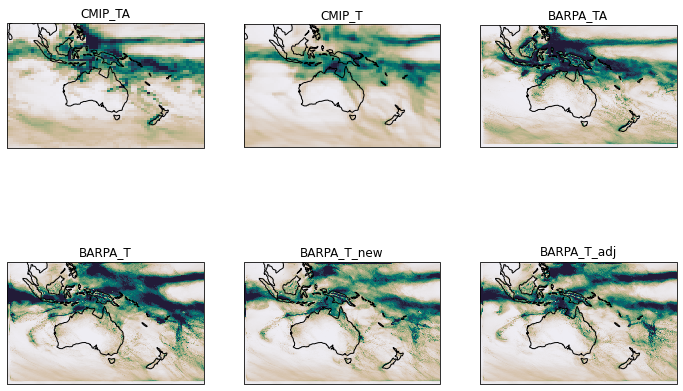

In [24]:
import cmocean
import cartopy.crs as ccrs
plt.figure(figsize=(12,8))
for i,key in enumerate(pr):
    ax=plt.subplot(2,3,i+1,projection=ccrs.PlateCarree(180))
    iplt.pcolormesh(pr[key],vmin=0,vmax=20,cmap=cmocean.cm.rain)
    plt.title(key)
    ax.coastlines()